In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Example
# nums = np.arange(20)
# plt.figure()
# plt.plot(nums, nums)
# plt.plot(nums, nums*nums)

In [5]:
# Transfer the dataset and parsing the ARREST_DATE to date type
arested_data = pd.read_csv("NYPD_Arrest_Data__Year_to_Date_ (1).csv", parse_dates = ["ARREST_DATE"])
arested_data.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,222491616,2021-01-01,114,OBSTR BREATH/CIRCUL,344,ASSAULT 3 & RELATED OFFENSES,PL 1211100,M,Q,105,0,<18,M,BLACK,1052653,181213,40.663809,-73.753443,POINT (-73.75344277999993 40.66380853400005)
1,222488075,2021-01-01,779,"PUBLIC ADMINISTRATION,UNCLASSI",126,MISCELLANEOUS PENAL LAW,PL 215510B,F,Q,105,0,<18,M,BLACK,1057767,203993,40.726293,-73.734761,POINT (-73.73476084899994 40.726293088000034)
2,222477058,2021-01-01,113,"MENACING,UNCLASSIFIED",344,ASSAULT 3 & RELATED OFFENSES,PL 1201500,M,B,44,0,18-24,F,BLACK,1005932,244916,40.838895,-73.921643,POINT (-73.92164308399998 40.83889473200002)
3,222488044,2021-01-01,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL 1211300,F,K,77,0,18-24,M,BLACK,1003508,185056,40.674600,-73.930575,POINT (-73.93057482199998 40.67459999000005)
4,222479320,2021-01-01,905,"INTOXICATED DRIVING,ALCOHOL",347,INTOXICATED & IMPAIRED DRIVING,VTL11920U2,M,Q,114,11,18-24,M,BLACK,1007654,219564,40.769306,-73.915508,POINT (-73.91550817999997 40.76930608700008)


In [6]:
# Check the types: especially date,age_group, arrest_boro and ofens description. 
# note: coordinates columns (by documentation) need to be objects.I did not change them because I will not use them for now.
arested_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153887 entries, 0 to 153886
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ARREST_KEY                153887 non-null  int64         
 1   ARREST_DATE               153887 non-null  datetime64[ns]
 2   PD_CD                     153887 non-null  int64         
 3   PD_DESC                   153887 non-null  object        
 4   KY_CD                     153887 non-null  int64         
 5   OFNS_DESC                 153887 non-null  object        
 6   LAW_CODE                  153887 non-null  object        
 7   LAW_CAT_CD                153887 non-null  object        
 8   ARREST_BORO               153887 non-null  object        
 9   ARREST_PRECINCT           153887 non-null  int64         
 10  JURISDICTION_CODE         153887 non-null  int64         
 11  AGE_GROUP                 153887 non-null  object        
 12  PE

In [48]:
# Check for duplicates. Used Arrest_Key since it is unique value
arested_data[arested_data["ARREST_KEY"].duplicated()]

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column


In [7]:
# Drop all rows with missing values.
arested_data.dropna(axis = 0,inplace = True)
# Check 
arested_data.isna().sum()

ARREST_KEY                  0
ARREST_DATE                 0
PD_CD                       0
PD_DESC                     0
KY_CD                       0
OFNS_DESC                   0
LAW_CODE                    0
LAW_CAT_CD                  0
ARREST_BORO                 0
ARREST_PRECINCT             0
JURISDICTION_CODE           0
AGE_GROUP                   0
PERP_SEX                    0
PERP_RACE                   0
X_COORD_CD                  0
Y_COORD_CD                  0
Latitude                    0
Longitude                   0
New Georeferenced Column    0
dtype: int64

In [9]:
# Create the DataFrame of youth arested_data to work with
youth = arested_data[(arested_data.AGE_GROUP == "<18") | (arested_data.AGE_GROUP == "18-24")]
youth.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,222491616,2021-01-01,114,OBSTR BREATH/CIRCUL,344,ASSAULT 3 & RELATED OFFENSES,PL 1211100,M,Q,105,0,<18,M,BLACK,1052653,181213,40.663809,-73.753443,POINT (-73.75344277999993 40.66380853400005)
1,222488075,2021-01-01,779,"PUBLIC ADMINISTRATION,UNCLASSI",126,MISCELLANEOUS PENAL LAW,PL 215510B,F,Q,105,0,<18,M,BLACK,1057767,203993,40.726293,-73.734761,POINT (-73.73476084899994 40.726293088000034)
2,222477058,2021-01-01,113,"MENACING,UNCLASSIFIED",344,ASSAULT 3 & RELATED OFFENSES,PL 1201500,M,B,44,0,18-24,F,BLACK,1005932,244916,40.838895,-73.921643,POINT (-73.92164308399998 40.83889473200002)
3,222488044,2021-01-01,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL 1211300,F,K,77,0,18-24,M,BLACK,1003508,185056,40.674600,-73.930575,POINT (-73.93057482199998 40.67459999000005)
4,222479320,2021-01-01,905,"INTOXICATED DRIVING,ALCOHOL",347,INTOXICATED & IMPAIRED DRIVING,VTL11920U2,M,Q,114,11,18-24,M,BLACK,1007654,219564,40.769306,-73.915508,POINT (-73.91550817999997 40.76930608700008)


In [50]:
# For info: checked the differenses between youth and adults crimes in boroughs.
youth.value_counts("ARREST_BORO")

ARREST_BORO
M    8786
K    8728
B    7327
Q    7007
S    1569
dtype: int64

In [51]:
arested_data.value_counts("ARREST_BORO")

ARREST_BORO
K    41277
M    39009
B    33622
Q    32790
S     7189
dtype: int64

In [11]:
# Number of youth arrests (for info)
youth_arrest = youth.value_counts("ARREST_DATE")
youth_arrest

ARREST_DATE
2021-11-17    641
2021-12-01    594
2021-11-10    577
2021-11-09    573
2021-12-02    556
             ... 
2021-05-28      1
2021-04-27      1
2021-03-25      1
2021-08-18      1
2021-08-13      1
Length: 176, dtype: int64

In [41]:
# for future consideration:  adult`s arested_data
arested_data1 = arested_data[(arested_data.AGE_GROUP == "25-44") | (arested_data.AGE_GROUP == "45-64") | (arested_data.AGE_GROUP == "65+")]

In [529]:
# Check how many type of ofns on Queens example... Note: to many to be display on the chart: will check only top 10
Q = youth[youth.ARREST_BORO =="Q"].value_counts("OFNS_DESC").count()
Q

47

Text(0.5, 0, 'Top 10 Youth Crime In NYC.')

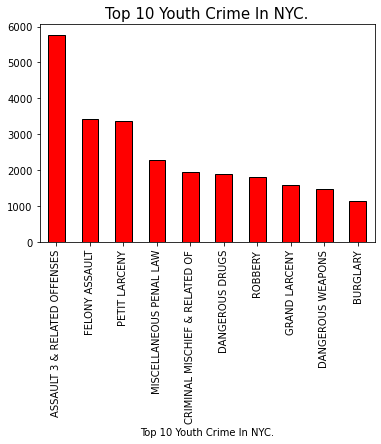

In [12]:
# Bar chart of Top 10 youth crime in NYC
youth.loc[:,["OFNS_DESC"]].value_counts("OFNS_DESC").head(10).plot(kind = "bar", color ="r", edgecolor ="black")
plt.title("Top 10 Youth Crime In NYC.", fontsize = 15)
plt.xlabel("Top 10 Youth Crime In NYC.")

Text(0.5, 0, 'Top 10 Crimes In Bronx.')

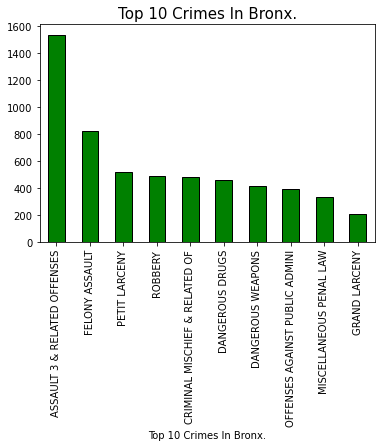

In [13]:
# Top 10 crimes in each borought for analysis ( almost the same crimes)
youth[(youth.ARREST_BORO == "B")].value_counts("OFNS_DESC").head(10).plot(kind = "bar", color ="g", edgecolor ="black")
plt.title("Top 10 Crimes In Bronx.",fontsize = 15)
plt.xlabel("Top 10 Crimes In Bronx.")

Text(0.5, 0, 'Top 10 Crimes In Kingsborough.')

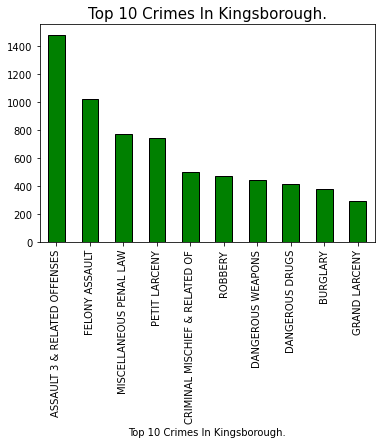

In [14]:
youth[(youth.ARREST_BORO == "K")].value_counts("OFNS_DESC").head(10).plot(kind = "bar", color ="g", edgecolor ="black")

plt.title("Top 10 Crimes In Kingsborough.",fontsize = 15)
plt.xlabel("Top 10 Crimes In Kingsborough.")

Text(0.5, 0, 'Top 10 Crimes In Queens.')

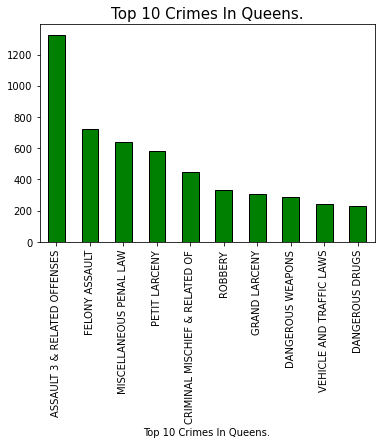

In [15]:
youth[(youth.ARREST_BORO == "Q")].value_counts("OFNS_DESC").head(10).plot(kind = "bar", color ="g", edgecolor ="black")
plt.title("Top 10 Crimes In Queens.",fontsize = 15)
plt.xlabel("Top 10 Crimes In Queens.")

Text(0.5, 0, 'Top 10 Crimes In Manhatten.')

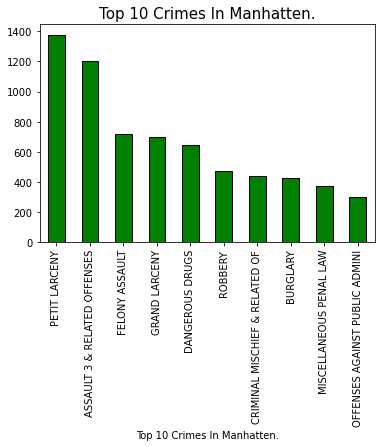

In [16]:
youth[(youth.ARREST_BORO == "M")].value_counts("OFNS_DESC").head(10).plot(kind = "bar", color ="g", edgecolor ="black")
plt.title("Top 10 Crimes In Manhatten.",fontsize = 15)
plt.xlabel("Top 10 Crimes In Manhatten.")

Text(0.5, 0, 'Top 10 Crimes In Staten Island.')

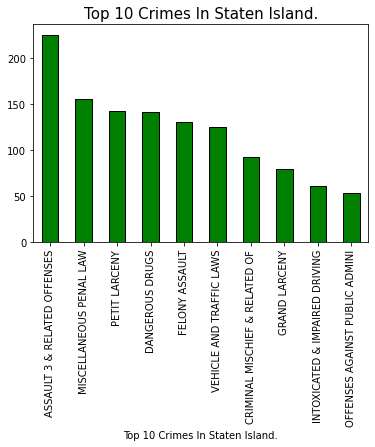

In [17]:
youth[(youth.ARREST_BORO == "S")].value_counts("OFNS_DESC").head(10).plot(kind = "bar", color ="g", edgecolor ="black")
plt.title("Top 10 Crimes In Staten Island.",fontsize = 15)
plt.xlabel("Top 10 Crimes In Staten Island.")

([<matplotlib.patches.Wedge at 0x20201afb400>,
 [Text(0.7456141557509467, 0.8087394702521963, 'Kingsborough'),
  Text(-0.862830546433258, 0.682292787695785, 'Manhattan'),
  Text(-0.7339816733877569, -0.8193112370344425, 'Bronx'),
  Text(0.6364917961848626, -0.8971500395080899, 'Queens'),
  Text(1.5826254780886155, -0.23515228279729844, 'Staten Island')],
 [Text(0.40669863040960724, 0.44113062013756155, '26.3%'),
  Text(-0.4706348435090497, 0.3721597023795191, '26.1%'),
  Text(-0.40035364002968554, -0.4468970383824232, '21.9%'),
  Text(0.34717734337356143, -0.4893545670044126, '21.0%'),
  Text(1.0880550161859233, -0.16166719442314265, '4.7%')])

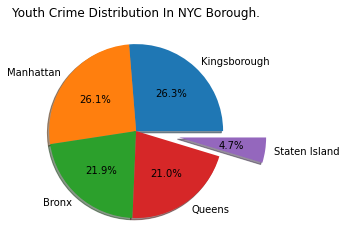

In [30]:
# Pie chart to display the youth crime distribution between boroughts

plt.title("Youth Crime Distribution In NYC Borough.")
arrest_boro = youth.value_counts("ARREST_BORO")
label_s = ["Kingsborough","Manhattan","Bronx","Queens", "Staten Island"]
#plt.legend()

myexplode = [0, 0, 0, 0, 0.5]
plt.pie(arrest_boro,labels = label_s,autopct='%0.1f%%',radius=1,startangle=0, explode = myexplode, shadow =True)


# From Lybrary/Dictionary
# matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, 
# labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None,
# textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, data=None)

In [ ]:
# Note: For scatter plots "youth crime ration by borough" was taken data of 2019 before the pandemy 
# from NYC population website populationU and NYC data from Baruch College Zickin School of business website

In [18]:
# Bronx statistic of youth crime ration by borough

B_youth_pop = 1418207

# Data from (Baruch Col) was in persentage from overall population. Used youth ages 15-24

pb_15 = 6.6
pb_24 = 7
B_crime = youth[(youth.ARREST_BORO == "B")].value_counts("OFNS_DESC").sum()

#Ratio of youth population by crime in particular borough

B_ratio=((pb_15 / 100 * B_youth_pop) + (pb_24 / 100 * B_youth_pop)) / B_crime
B_ratio


26.324027842227377

In [19]:
# Kingsborough statistic of youth crime ration by borough

K_youth_pop = 2559903
pk_15 = 5.3
pk_24 = 6
K_crime = youth[(youth.ARREST_BORO == "K")].value_counts("OFNS_DESC").sum()

#Ratio of youth population by crime in particular borough

K_ratio=((pk_15 / 100 * K_youth_pop) + (pk_24 / 100 * K_youth_pop)) / K_crime
K_ratio


33.14264883134739

In [20]:
# Queens statistic of youth crime ration by borough

Q_youth_pop = 2253858
pq_15 = 5.1
pq_24 = 5.6
Q_crime = youth[(youth.ARREST_BORO == "Q")].value_counts("OFNS_DESC").sum()

#Ratio of youth population by crime in particular borough

Q_ratio = ((pq_15 / 100 * Q_youth_pop) + (pq_24 / 100 * Q_youth_pop)) / Q_crime
Q_ratio



34.41741201655487

In [21]:
# Manhattan statistic of youth crime ration by borough

M_youth_pop = 1628706
pm_15 = 4.2
pm_24 = 6.8
M_crime = youth[(youth.ARREST_BORO == "M")].value_counts("OFNS_DESC").sum()

#Ratio of youth population by crime in particular borough

M_ratio=((pm_15 / 100 * M_youth_pop) + (pm_24 / 100 * M_youth_pop)) / M_crime
M_ratio


20.391265649897566

In [22]:
# Staten Island statistic of youth crime ration by borough

S_youth_pop = 476143
ps_15 = 6.1
ps_24 = 6
S_crime = youth[(youth.ARREST_BORO == "S")].value_counts("OFNS_DESC").sum()

#Ratio of youth population by crime in particular borough

S_ratio=((ps_15 / 100 * S_youth_pop) + (ps_24 / 100 * S_youth_pop)) / S_crime
S_ratio


36.7197597195666

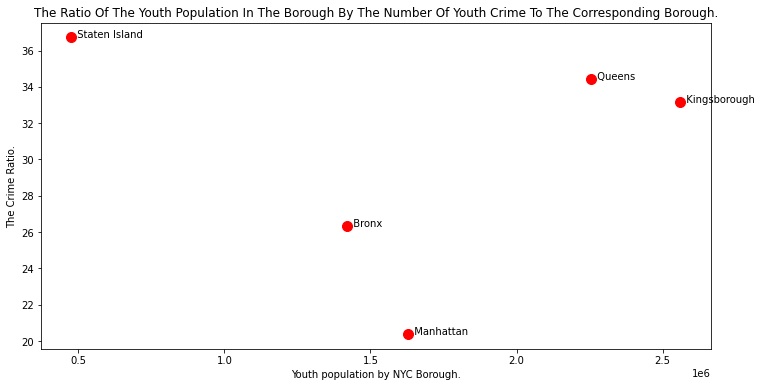

In [23]:
# Scatter plot of crime ration by borough of NYC
y = [M_ratio, Q_ratio, K_ratio, S_ratio,B_ratio ]
x = [M_youth_pop, Q_youth_pop, K_youth_pop, S_youth_pop, B_youth_pop]

annotations=["  Manhattan","  Queens","  Kingsborough","  Staten Island","  Bronx"]


plt.figure(figsize = (12, 6))
plt.scatter(x, y, s = 100, color = "red")
plt.title("The Ratio Of The Youth Population In The Borough By The Number Of Youth Crime To The Corresponding Borough.", fontsize = 12)
plt.xlabel("Youth population by NYC Borough.")
plt.ylabel("The Crime Ratio.")

# Enumerate() method adds a counter to an iterable and returns it in a form of enumerating object. 
# This enumerated object can then be used directly for loops or converted into a list of tuples using the list() method.

for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))

plt.show()


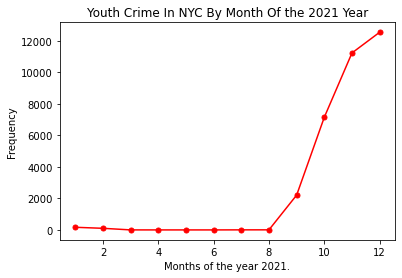

In [44]:
# Used dt=>datetimelike properties of the Series values to see crimes distributed by month
# Used sort_index() method to sort x axis

youth.ARREST_DATE.dt.month.value_counts().sort_index().plot(color = "r",marker='.', markersize=10)
plt.title("Youth Crime In NYC By Month Of the 2021 Year")
plt.xlabel("Months of the year 2021.")
plt.ylabel("Frequency")

# For future consideration: Created scatter plot with adult`s dataFrame "arested_data1" to see the differense

# totalB = arested_data1.sort_values("ARREST_DATE")
# totalB["ARREST_DATE"].dt.month.value_counts().sort_index().plot(marker='.', markersize=10)
#plt.grid()
plt.show()


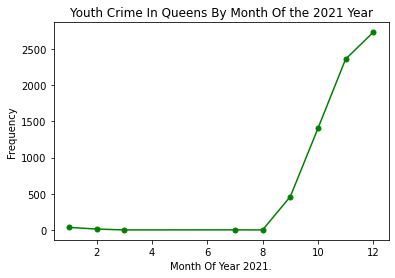

In [45]:
youth[(youth.ARREST_BORO == "Q")].value_counts(youth["ARREST_DATE"].dt.month).sort_index().plot(color = "g",marker='.', markersize=10)
plt.title("Youth Crime In Queens By Month Of the 2021 Year")
plt.xlabel("Month Of Year 2021.")
plt.ylabel("Frequency")
# plt.grid()
plt.show()

In [522]:
# Check the correctness of plot
youth[(youth.ARREST_BORO == "Q")].value_counts(youth["ARREST_DATE"].dt.month)

ARREST_DATE
12    2731
11    2360
10    1403
9      460
1       36
2       13
7        2
3        1
8        1
dtype: int64

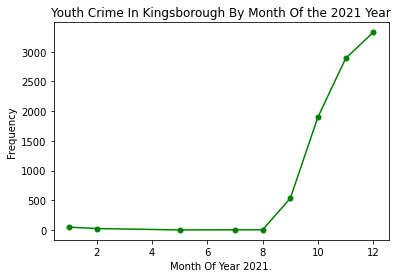

In [47]:
youth[(youth.ARREST_BORO == "K")].value_counts(youth["ARREST_DATE"].dt.month).sort_index().plot(color = "g",marker='.', markersize=10)
plt.title("Youth Crime In Kingsborough By Month Of the 2021 Year")
plt.xlabel("Month Of Year 2021.")
plt.ylabel("Frequency")
#plt.grid()
plt.show()

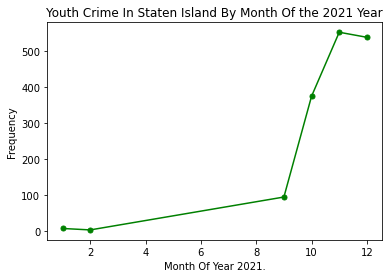

In [46]:

youth[(youth.ARREST_BORO == "S")].value_counts(youth["ARREST_DATE"].dt.month).sort_index().plot(color = "g",marker='.', markersize=10)
plt.title("Youth Crime In Staten Island By Month Of the 2021 Year")
plt.xlabel("Month Of Year 2021.")
plt.ylabel("Frequency")
#plt.grid()
plt.show()


Text(0, 0.5, 'Frequency')

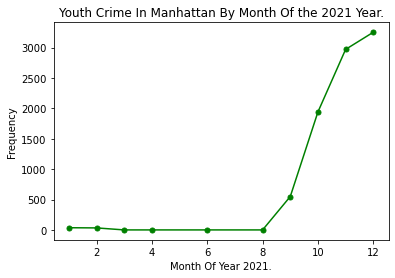

In [516]:
youth[(youth.ARREST_BORO == "M")].value_counts(youth["ARREST_DATE"].dt.month).sort_index().plot(color = "g",marker='.', markersize=10)
plt.title("Youth Crime In Manhattan By Month Of the 2021 Year.")
plt.xlabel("Month Of Year 2021.")
plt.ylabel("Frequency")

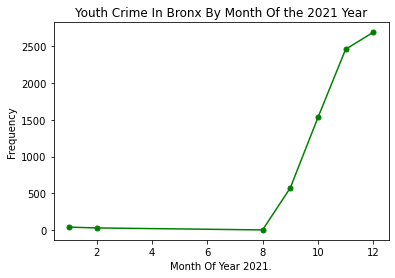

In [515]:
youth[(youth.ARREST_BORO == "B")].value_counts(youth["ARREST_DATE"].dt.month).sort_index().plot(color = "g",marker='.', markersize=10)
plt.title("Youth Crime In Bronx By Month Of the 2021 Year")
plt.xlabel("Month Of Year 2021.")
plt.ylabel("Frequency")
plt.show()

# plt.plot(labels, counts, color='maroon', marker='.', markersize=9.6, )


<AxesSubplot:title={'center':'Youth Crime by Month 2021'}, xlabel='Month Of 2021', ylabel='Frequency'>

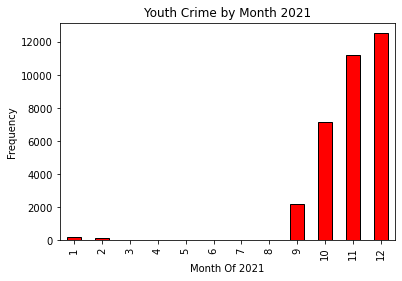

In [206]:
# Tried the bar graph to check for better visualisation.
plt.title("Youth Crime by Month 2021")
plt.ylabel("Frequency")
plt.xlabel("Month Of 2021")

# youth.sort_values("ARREST_DATE")

youth["ARREST_DATE"].dt.month.value_counts().sort_index().plot(kind="bar",color ="r", edgecolor = "black")